In [3]:
import os
import numpy as np
import pandas as pd


In [1]:
# cnv label数据路径
cnv_anno_dir = '/zfssz6/notpanic/zfssz4-import/zfssz4/BC_RD_P2/PROJECT/F16ZQSI1SH2595/ifs2_BC_RD_P2/zhangnan1/hmmcopy/sort/'

#reads数据
seq_reads_dir = '/zfssz6/notpanic/zfssz4-import/zfssz4/BC_RD_P2/PROJECT/F16ZQSI1SH2595/ifs2_BC_RD_P2/zhangnan1/hmmcopy/output_hmmcopy'

# 每个sample对应的kmer 
kmer_fname = '/zfssz6/notpanic/zfssz4-import/zfssz4/BC_RD_P2/PROJECT/F16ZQSI1SH2595/ifs2_BC_RD_P2/zhangnan1/all.kmer.data'



# 获得kmer=100 的所有样本

In [5]:
kmer_df = pd.read_csv(kmer_fname,sep='\t',header =None)
kmer_df.columns=['sample','kmer']
kmer_df.head()

FileNotFoundError: File b'/zfssz6/notpanic/zfssz4-import/zfssz4/BC_RD_P2/PROJECT/F16ZQSI1SH2595/ifs2_BC_RD_P2/zhangnan1/all.kmer.data' does not exist

In [15]:
kmer100_sample_lst =  np.unique(kmer_df[kmer_df['kmer']==100]['sample'].values)
len(kmer100_sample_lst)

993

In [124]:
#isample = kmer100_sample_lst[0]
isample ='NA12878'
bin_size = 500
chr_name = ['chr'+ str(i) for i in range(1,23)]+['chrX', 'chrY']
rc_sample_dir = os.path.join(seq_reads_dir,'out_'+str(bin_size))
isample_dir = os.path.join(rc_sample_dir,isample)

if os.path.isdir(isample_dir):
    print(isample_dir)
    # get the read count and gc content
    rc_gc_fname = os.path.join(isample_dir,isample+'.sorted.rmdup.realign.BQSR.cut.'+\
                               str(bin_size)+'.seg.hmmcopy.Corrected_copy_number')
    
    isample_df = pd.read_csv(rc_gc_fname,sep='\t')
    #for i_chr in chr_name:
    i_chr = chr_name[0]
    i_sample_df = isample_df.loc[isample_df['space']==i_chr,['space','start','end','reads','gc']]
    i_sample_df['gc']=i_sample_df['gc'].round(2).astype('str')#为了简单进行浮点数的比较


/zfssz6/notpanic/zfssz4-import/zfssz4/BC_RD_P2/PROJECT/F16ZQSI1SH2595/ifs2_BC_RD_P2/zhangnan1/hmmcopy/output_hmmcopy/out_500/NA12878


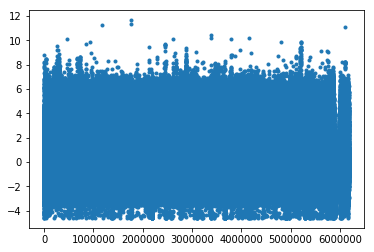

In [125]:
plt.plot(isample_df['copy'].values,'.')

In [126]:
val = isample_df['copy'].values
val = val[int(150792101/500):int(150884101/500)]

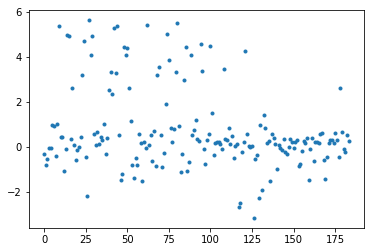

In [127]:
plt.plot(val,'.')

In [128]:
gc_median_rc_dict = i_sample_df.groupby(i_sample_df['gc']).agg(
        {'reads':np.median}).to_dict()['reads']
gc_median_rc_dict

{'-1.0': 0.0,
 '0.01': 0.0,
 '0.02': 0.0,
 '0.03': 0.0,
 '0.04': 0.0,
 '0.05': 0.0,
 '0.06': 0.0,
 '0.07': 0.5,
 '0.08': 0.0,
 '0.09': 0.0,
 '0.1': 0.0,
 '0.11': 0.0,
 '0.12': 1.0,
 '0.13': 1.0,
 '0.14': 1.0,
 '0.15': 1.0,
 '0.16': 1.0,
 '0.17': 2.0,
 '0.18': 2.0,
 '0.19': 2.0,
 '0.2': 2.0,
 '0.21': 3.0,
 '0.22': 4.0,
 '0.23': 4.0,
 '0.24': 5.0,
 '0.25': 5.0,
 '0.26': 6.0,
 '0.27': 6.0,
 '0.28': 6.0,
 '0.29': 7.0,
 '0.3': 7.0,
 '0.31': 7.0,
 '0.32': 8.0,
 '0.33': 8.0,
 '0.34': 8.0,
 '0.35': 8.0,
 '0.36': 9.0,
 '0.37': 9.0,
 '0.38': 9.0,
 '0.39': 9.0,
 '0.4': 9.0,
 '0.41': 9.0,
 '0.42': 9.0,
 '0.43': 9.0,
 '0.44': 10.0,
 '0.45': 10.0,
 '0.46': 10.0,
 '0.47': 10.0,
 '0.48': 10.0,
 '0.49': 10.0,
 '0.5': 10.0,
 '0.51': 11.0,
 '0.52': 11.0,
 '0.53': 11.0,
 '0.54': 12.0,
 '0.55': 12.0,
 '0.56': 12.0,
 '0.57': 12.0,
 '0.58': 13.0,
 '0.59': 13.0,
 '0.6': 13.0,
 '0.61': 13.0,
 '0.62': 12.0,
 '0.63': 13.0,
 '0.64': 12.0,
 '0.65': 12.0,
 '0.66': 11.0,
 '0.67': 10.0,
 '0.68': 10.0,
 '0.69': 9.0,
 

In [129]:
# 计算调整后的read count
# 见https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2752127/
def adjust_rc(sample_df):
    '''
    function to adjust read count based on method in 
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2752127/
    
    sample_df: dataframe
    '''
    
    gc_median_rc_dict = sample_df.groupby(sample_df['gc']).agg(
        {'reads':np.median}).to_dict()['reads']
    
    g_median_rc = sample_df['reads'].median()
    
    sample_df['adj_reads']= sample_df.apply(lambda x: x['reads']*g_median_rc/gc_median_rc_dict[x['gc']] \
                                            if gc_median_rc_dict[x['gc']] >0 else None, axis = 1)
    
    sample_df['adj_reads']= 2*sample_df['adj_reads']/sample_df['adj_reads'].mean()
    
    return sample_df

In [130]:
adj_rc_df = adjust_rc(i_sample_df)


In [131]:
adj_rc_df.head(50)

,space,start,end,reads,gc,adj_reads
0,chr1,1,500,0,-1.0,NaN
1,chr1,501,1000,0,-1.0,NaN
2,chr1,1001,1500,0,-1.0,NaN
3,chr1,1501,2000,0,-1.0,NaN
4,chr1,2001,2500,0,-1.0,NaN
5,chr1,2501,3000,0,-1.0,NaN
6,chr1,3001,3500,0,-1.0,NaN
7,chr1,3501,4000,0,-1.0,NaN
8,chr1,4001,4500,0,-1.0,NaN
9,chr1,4501,5000,0,-1.0,NaN


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
val = adj_rc_df['adj_reads'].values/2
val = val[int(150792101/500):int(150884101/500)]

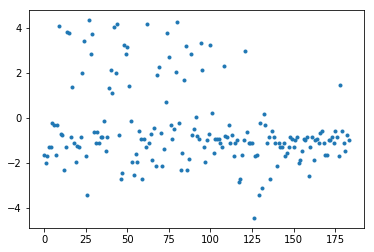

In [133]:
plt.plot(np.log2(val),'.')

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


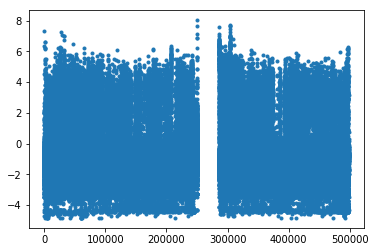

In [134]:
plt.plot(np.log2(adj_rc_df['adj_reads'].values/2),'.')

In [81]:
np.max(adj_rc_df['adj_reads'].values)

2614.5

In [69]:
i_sample_df[395:401]

,space,start,end,reads,gc
395,chr1,197501,198000,1,0.418
396,chr1,198001,198500,3,0.34
397,chr1,198501,199000,3,0.368
398,chr1,199001,199500,3,0.512
399,chr1,199501,200000,0,0.778
400,chr1,200001,200500,1,0.62


In [18]:
chr_name = ['chr'+ str(i) for i in range(1,23)]+['chrX', 'chrY']

In [19]:
chr_name

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX',
 'chrY']